In [9]:
import pandas as pd

# Load the CSV
df = pd.read_csv("yearly_sales.csv")

# Rename the columns for Prophet compatibility
df.rename(columns={
    "Year": "ds",
    "Sum of Sales": "y"
}, inplace=True)

# Convert 'ds' to datetime format (required by Prophet)
df["ds"] = pd.to_datetime(df["ds"], format="%Y")

print(df.head())

          ds  Sum of sales
0 2011-01-01  $481,763.80 
1 2012-01-01  $464,426.24 
2 2013-01-01  $600,533.49 
3 2014-01-01  $725,726.33 


<>:16: SyntaxWarning: invalid escape sequence '\$'
<>:16: SyntaxWarning: invalid escape sequence '\$'
C:\Users\anant\AppData\Local\Temp\ipykernel_6600\2145592875.py:16: SyntaxWarning: invalid escape sequence '\$'
  df["y"] = df["y"].replace('[\$,]', '', regex=True).astype(float)
15:30:46 - cmdstanpy - INFO - Chain [1] start processing
15:30:46 - cmdstanpy - INFO - Chain [1] done processing


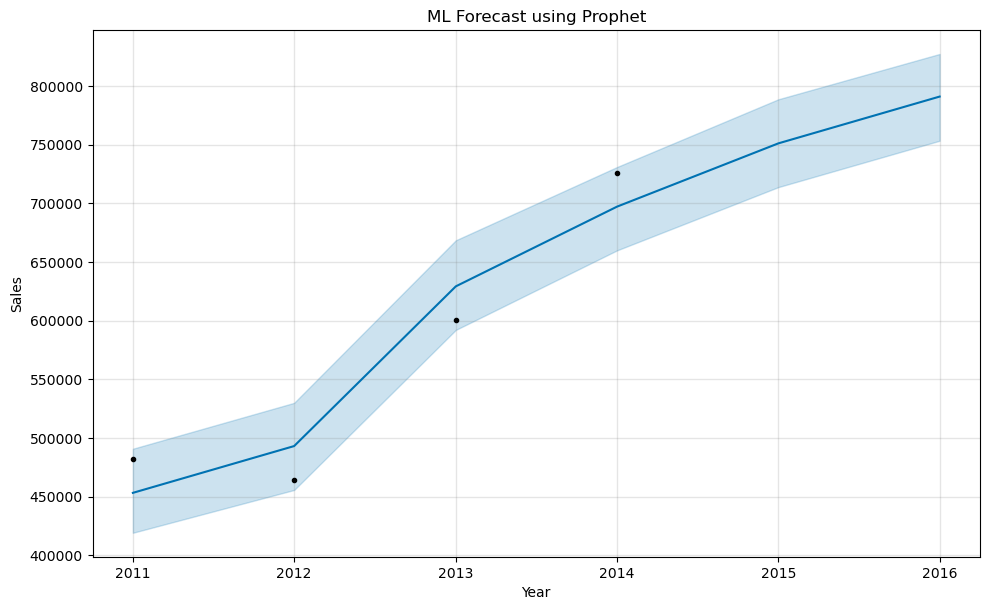

In [43]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Step 1: Load CSV
df = pd.read_csv("yearly_sales.csv")  # Replace with your filename

# Step 2: Strip spaces from headers and rename
df.columns = df.columns.str.strip()
df = df.rename(columns={"Year": "ds", "Sum of sales": "y"})  # Adjust if needed

# Step 3: Convert ds to datetime (just years)
df["ds"] = pd.to_datetime(df["ds"], format="%Y")

# Step 4: Clean the y column (remove currency symbols and commas)
df["y"] = df["y"].replace('[\$,]', '', regex=True).astype(float)

# Step 5: Fit the model
model = Prophet()
model.fit(df)

# Step 6: Forecast for 1 year
future = model.make_future_dataframe(periods=2, freq='YS')
forecast = model.predict(future)


# Step 7: Plot
fig = model.plot(forecast)
plt.title("ML Forecast using Prophet")
plt.xlabel("Year")
plt.ylabel("Sales")
plt.show()

In [45]:
forecast[['ds', 'yhat']].to_csv("ml_forecast.csv", index=False)